In [13]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl

from qs_mps.applications.Z2.exact_hamiltonian import *
from qs_mps.sparse_hamiltonians_and_operators import diagonalization, sparse_magnetization
from qs_mps.mps_class import MPS

In [5]:
L = 3
l = 3
ladder = H_Z2_gauss(l=3,L=L, model="Z2", lamb=0, J=1)
H = ladder.hamiltonian()

In [6]:
e, v = diagonalization(H, sparse=False)
print(e)

[-1.2000e+01 -4.0000e+00 -4.0000e+00 ...  3.2004e+04  3.2004e+04
  3.2004e+04]


In [11]:
print(v[:,0])
print((1/np.sqrt(2))**12)

[-0.015625+0.j -0.015625+0.j -0.015625+0.j ... -0.015625+0.j -0.015625+0.j
 -0.015625+0.j]
0.015624999999999983


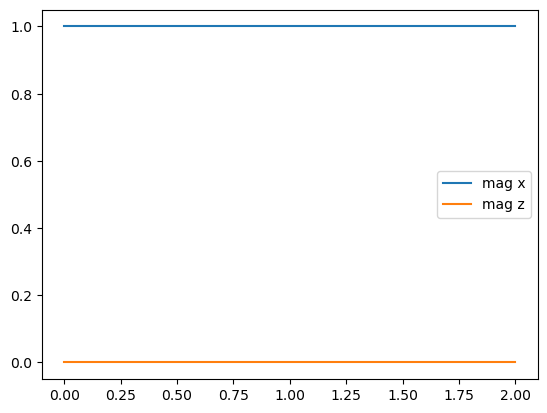

In [12]:
psi = v[:,0]
mag_x = []
mag_z = []
for i in range(L):
    mag = (psi.conjugate() @ (sparse_pauli_x(n=i, L=12)) @ psi).real
    mag_x.append(mag)
    mag = (psi.conjugate() @ (sparse_pauli_z(n=i, L=12)) @ psi).real
    mag_z.append(mag)
plt.plot(mag_x,label="mag x")
plt.plot(mag_z,label="mag z")
plt.legend()
plt.show()

## Add an external field

transverse field: 0.0
transverse field: 0.010101010101010102
transverse field: 0.020202020202020204
transverse field: 0.030303030303030304
transverse field: 0.04040404040404041
transverse field: 0.05050505050505051
transverse field: 0.06060606060606061
transverse field: 0.07070707070707072
transverse field: 0.08080808080808081
transverse field: 0.09090909090909091
transverse field: 0.10101010101010102
transverse field: 0.11111111111111112
transverse field: 0.12121212121212122
transverse field: 0.13131313131313133
transverse field: 0.14141414141414144
transverse field: 0.15151515151515152
transverse field: 0.16161616161616163
transverse field: 0.17171717171717174
transverse field: 0.18181818181818182
transverse field: 0.19191919191919193
transverse field: 0.20202020202020204
transverse field: 0.21212121212121213
transverse field: 0.22222222222222224
transverse field: 0.23232323232323235
transverse field: 0.24242424242424243
transverse field: 0.25252525252525254
transverse field: 0.26262

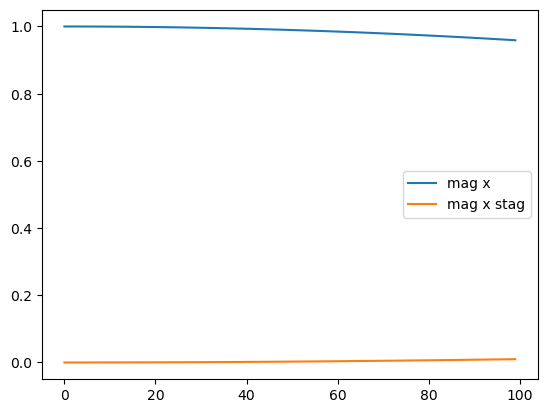

In [16]:
L = 3
l = 3
mag_x = []
mag_x_st = []
for lamb in np.linspace(0,1,100):
    print(f"transverse field: {lamb}")
    ladder = H_Z2_gauss(J=1, lamb=lamb, model="Z2", L=L, l=l)
    H = ladder.hamiltonian()
    e, v = diagonalization(H, sparse=True)
    psi = v[:,0]
    mag = (psi.conjugate() @ sparse_magnetization(L=12) @ psi).real
    mag_x.append(mag)
    mag = (psi.conjugate() @ sparse_magnetization(L=12, staggered=True) @ psi).real
    mag_x_st.append(mag)
plt.plot(mag_x,label="mag x")
plt.plot(mag_x_st,label="mag x stag")
plt.legend()
plt.show()

## Make it 2D

In [13]:
L = 12
mag_x = []
mag_x_st = []
mag_z = []
rdms = []
i = 0.01
f = 1.5
delta = 32
eps = 1e-1
grid_h = np.linspace(i, f, delta).tolist()
grid_h.reverse()
grid_k = np.linspace(i, f, delta)

v0 = np.zeros((2**L,1))
v0[0] = 1

for k in grid_k:
    mag_x_j = []
    mag_x_st_j = []
    mag_z_j = []
    rdm_j = []
    for h in grid_h:
        print(f"transverse field h: {h} for k: {k}")
        H = sparse_ANNNI_hamiltonian(J=1, h_t=h, h_ll=k, L=L, eps=eps, deg_method=1)
        e, v = diagonalization(H, sparse=True, v0=v0)
        psi = v[:,0]
        mag = (psi.conjugate() @ sparse_magnetization(L=L) @ psi).real
        mag_x_j.append(mag)
        mag = (psi.conjugate() @ sparse_magnetization(L=L, staggered=True) @ psi).real
        mag_x_st_j.append(mag)
        mag = (psi.conjugate() @ (sparse_pauli_z(n=L//2, L=L)) @ psi).real
        mag_z_j.append(mag)
        v0 = psi

        chain = MPS(L=L, d=2, model="ANNNI", chi=64)
        chain.vector_to_mps(vec=psi, chi=64)
        rdm = chain.reduced_density_matrix([L//2-2,L//2-1,L//2,L//2+1])
        rdm_j.append(rdm)

    mag_x_j.reverse()
    mag_x_st_j.reverse()
    mag_z_j.reverse()
    rdm_j.reverse()
    mag_x.append(mag_x_j)
    mag_x_st.append(mag_x_st_j)
    mag_z.append(mag_z_j)
    rdms.append(rdm_j)

mag_x = np.asarray(mag_x)
mag_x_st = np.asarray(mag_x_st)
mag_z = np.asarray(mag_z)
rdms = np.asarray(rdms)

transverse field h: 1.5 for k: 0.01
transverse field h: 1.4519354838709677 for k: 0.01
transverse field h: 1.4038709677419354 for k: 0.01
transverse field h: 1.3558064516129031 for k: 0.01
transverse field h: 1.307741935483871 for k: 0.01
transverse field h: 1.2596774193548388 for k: 0.01
transverse field h: 1.2116129032258065 for k: 0.01
transverse field h: 1.1635483870967742 for k: 0.01
transverse field h: 1.115483870967742 for k: 0.01
transverse field h: 1.0674193548387096 for k: 0.01
transverse field h: 1.0193548387096774 for k: 0.01
transverse field h: 0.9712903225806452 for k: 0.01
transverse field h: 0.9232258064516129 for k: 0.01
transverse field h: 0.8751612903225807 for k: 0.01
transverse field h: 0.8270967741935484 for k: 0.01
transverse field h: 0.7790322580645161 for k: 0.01
transverse field h: 0.7309677419354839 for k: 0.01
transverse field h: 0.6829032258064516 for k: 0.01
transverse field h: 0.6348387096774194 for k: 0.01
transverse field h: 0.5867741935483871 for k: 0.

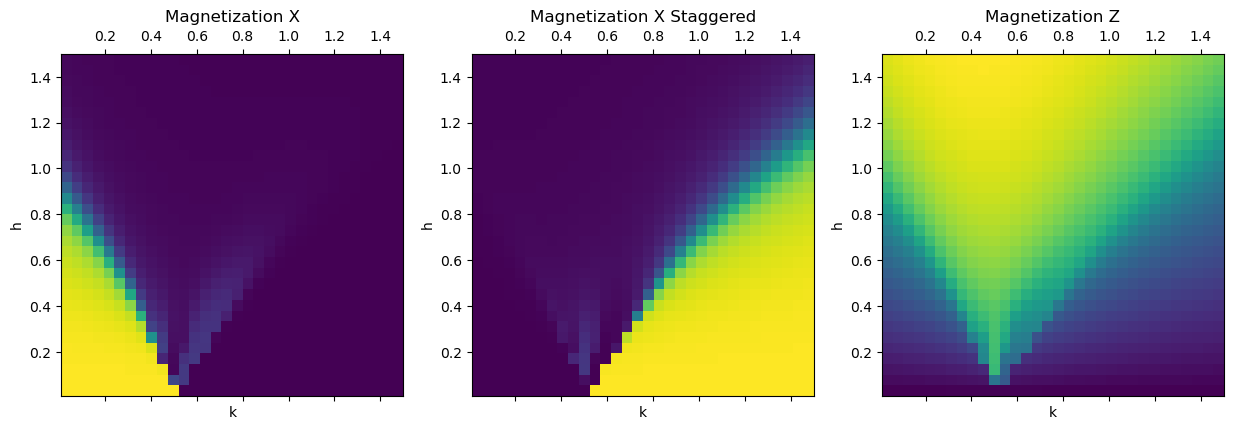

In [14]:
params = [[h,k] for h in grid_h for k in grid_k]
params_extent = np.concatenate([np.min(params, axis=0), np.max(params, axis=0)])
params_extent = tuple(params_extent[[0, 2, 1, 3]])

fig, ax = plt.subplots(1,3, figsize=(15,10))
ax[0].matshow(mag_x.T, origin='lower', extent=params_extent)
ax[0].set_title("Magnetization X")
ax[0].set_xlabel("k")
ax[0].set_ylabel("h")
ax[1].matshow(mag_x_st.T, origin='lower', extent=params_extent)
ax[1].set_title("Magnetization X Staggered")
ax[1].set_xlabel("k")
ax[1].set_ylabel("h")
ax[2].matshow(mag_z.T, origin='lower', extent=params_extent)
ax[2].set_title("Magnetization Z")
ax[2].set_xlabel("k")
ax[2].set_ylabel("h");

In [15]:
path_rdms = "/Users/fradm98/Desktop/fidelity-phase-tran"
np.save(f"{path_rdms}/results/data/X_4-rdms_ANNNI_L_{L}_h-k_{i}-{f}_delta_{delta}_degeneracy_method_1_eps_{eps}_guess_path.npy", rdms)